![ICL](Images/imperiallogo.jpeg)

# Introduction to Bayesian methods in ecology and evolution

## Monday: 03 - Bayesian applications in genomics

### Reconstructing genomes from sequencing data

You are going to develop and implement a Bayesian approach to reconstruct genomes from data produced from high-throughput sequencing machines. 

Specifically, you will be doing __genotype calling__ from short-read NGS data.

<img src="Images/NGS.png" width="400" height="400" />

Load the *R* functions needed with `source("Data/functions.R")`.

Among these functions, we provide one that calculates the likelihood of a certain sequence of bases
for diploid individuals.
This function is called _calcGenoLikes_ and takes 5 paramaters in input:
* the sequence itself (collection of bases)
* the first allele of the genotype
* the second allele of the genotype
* the sequencing error rate
* a boolean indicating whether the results should be returned in logarithmic scale (TRUE) or not (FALSE)

In [1]:
source("Data/functions.R")

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.6-0 (2020-12-14) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 




For instance, assuming that your sequence is `AATATTA`, your alleles are `A` and `T` (meaning that you want to calculate the likelihood for genotypes `{AA,AT,TT}`, and your sequencing error rate is 0.05, then the likelihood (not in logarithms) for each genotype is given by 
```calcGenoLikes("AATATTA", "A", "T", 0.05, FALSE)```

In [6]:
calcGenoLikes("AATATTA", "A", "T", 0.05, FALSE)

AA           AT           TT 
3.770862e-06 6.162079e-03 6.615548e-08

Complete all the following tasks using *R* when necessary.
The key point of these exercises is to not recalculate quantities that you have already computed.
The aim is that you should be able to understand whether the likelihood or the prior is the same (or not)
between different scenarios.

___A)___ 

Using Bayes' theorem, write the formula for the posterior probability of genotype G being
AA given the sequencing data D.
Write the explicit denominator assuming that your alleles are A and T and all possible genotypes are only AA, AT, TT.

___B)___ 

Assuming that your data is `AAAT`, your alleles are A and T, and the sequencing error rate is 0.01,
calculate genotype posterior probability using a uniform prior, e.g. $P(G=AA) = P(G=AT) = P(G=TT) = ?$

In [69]:
P <- calcGenoLikes("AAAT", "A", "T", 0.01, FALSE)

posterior_B <- c()
for(i in 1:3){
    posterior_B <- c(posterior_B, P[i]*1/3 / sum(P*1/3) )
}


posterior_B

sum(posterior_B)


AA           AT           TT 
5.046993e-02 9.495295e-01 5.721631e-07

[1] 1

ERROR: Error in barplot(posteriors_B): object 'posteriors_B' not found


___C)___ 

With the same assumptions as in point B, calculate genotype posterior probabilities using prior probabilitties based on [Hardy Weinberg Equilibrium](https://en.wikipedia.org/wiki/Hardy–Weinberg_principle) with a frequency of T of 0.1. Do you need to calculate a new likelihood or is it the same one as in point B?

In [35]:
t <- 0.1
Priors_C <- c( (1-t)^2, 2*t*(1-t), t^2)
Priors_C
posterior_C <- P * Priors_C / sum(P * Priors_C)
posterior_C

[1] 0.81 0.18 0.01

AA           AT           TT 
1.930190e-01 8.069810e-01 2.701483e-08

___D)___  

With the same assumptions as in point C, calculate genotype posterior probabilities using a prior based on Hardy Weinberg Equilibrium with a frequency of T of 0.1 and an [inbreeding coefficient](https://en.wikipedia.org/wiki/Inbreeding) of 0.2.
In this case, we need to modify our previous priors.
Specifically, if $f$ is the frequency of allele A and $I$ is the inbreeding coefficient,
then the prior probabilities for all genotypes are:
* $p(AA)=f^2 + I \times f \times (1-f)$
* $p(AT)=2 \times f \times (1-f) \times (1-I)$
* $p(TT)=(1-f)^2 + I \times f \times (1-f)$

Do you need to calculate a new likelihood or is it the same one as in points B and C?

In [38]:
t <- 0.1
i <- 0.2
priors_D <- c( (1-t)^2+i*t*(1-t), 2*t*(1-t)*(1-i), t^2+i*t*(1-t) )
priors_D
posterior_D <- P * priors_D / sum(P *priors_D)
posterior_D

[1] 0.828 0.144 0.028

AA           AT           TT 
2.340846e-01 7.659153e-01 8.974033e-08

___E)___ 

With the same priors used in point D but with a sequencing error rate of 0.05, calculate the genotype posterior probabilities. Do you need to calculate a new likelihood or is it the same one as in point D?


In [42]:
P_0.05 <- calcGenoLikes("AAAT", "A", "T", 0.05, FALSE)
P_0.05
# prior_E <- prior_D
prior_E <- c( (1-t)^2+i*t*(1-t), 2*t*(1-t)*(1-i), t^2+i*t*(1-t) )
posteriors_E <- P_0.05 * prior_E / sum(prior_E * P_0.05)
posteriors_E
sum(posteriors_E)

AA           AT           TT 
1.428958e-02 5.457415e-02 4.398148e-06

AA           AT           TT 
6.008852e-01 3.991086e-01 6.254167e-06

[1] 1

___F)___ 

Plot all previous results (e.g. use a barplot with the 3 posterior probabilities for each scenario B-E).

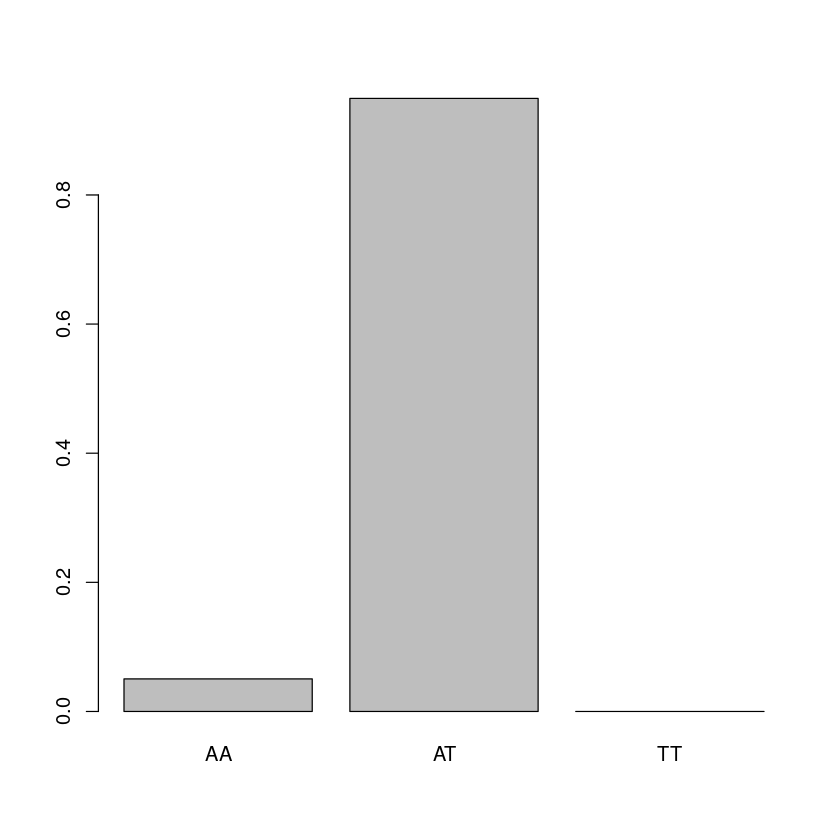

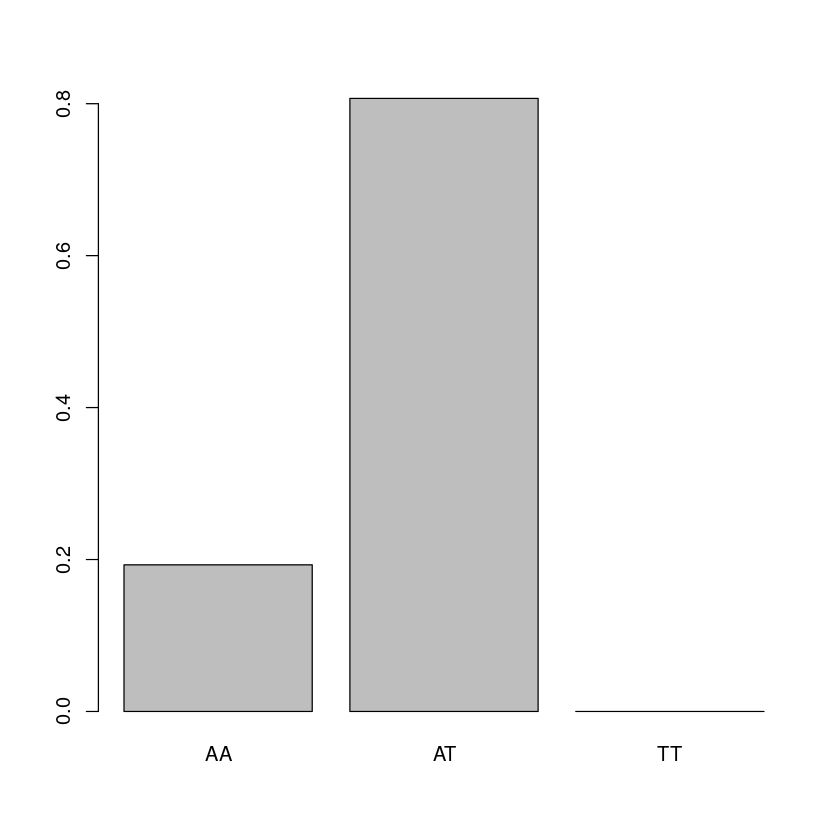

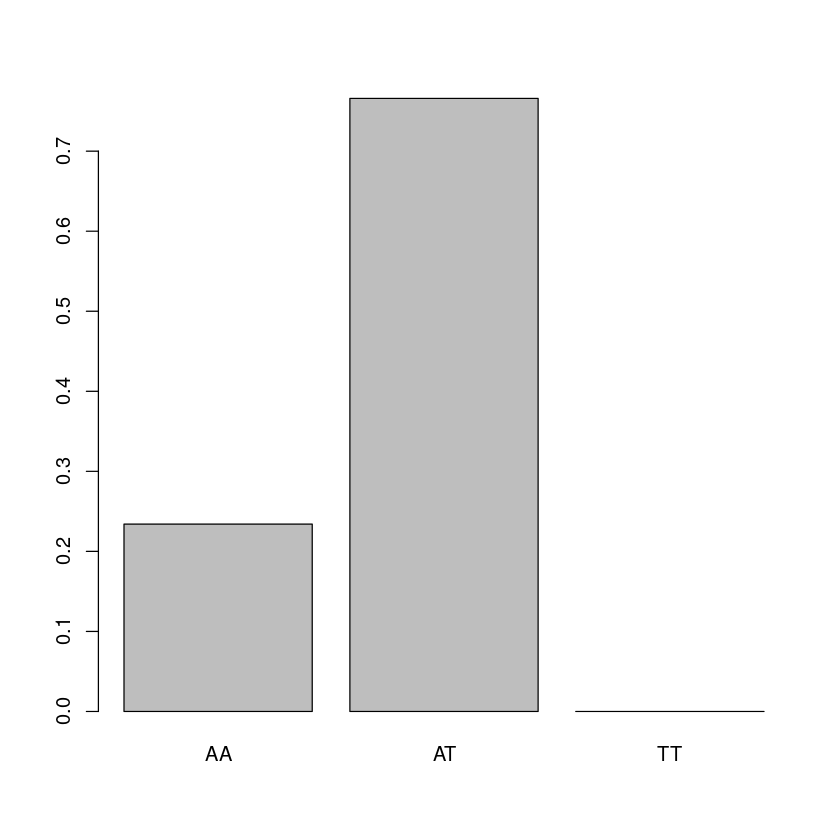

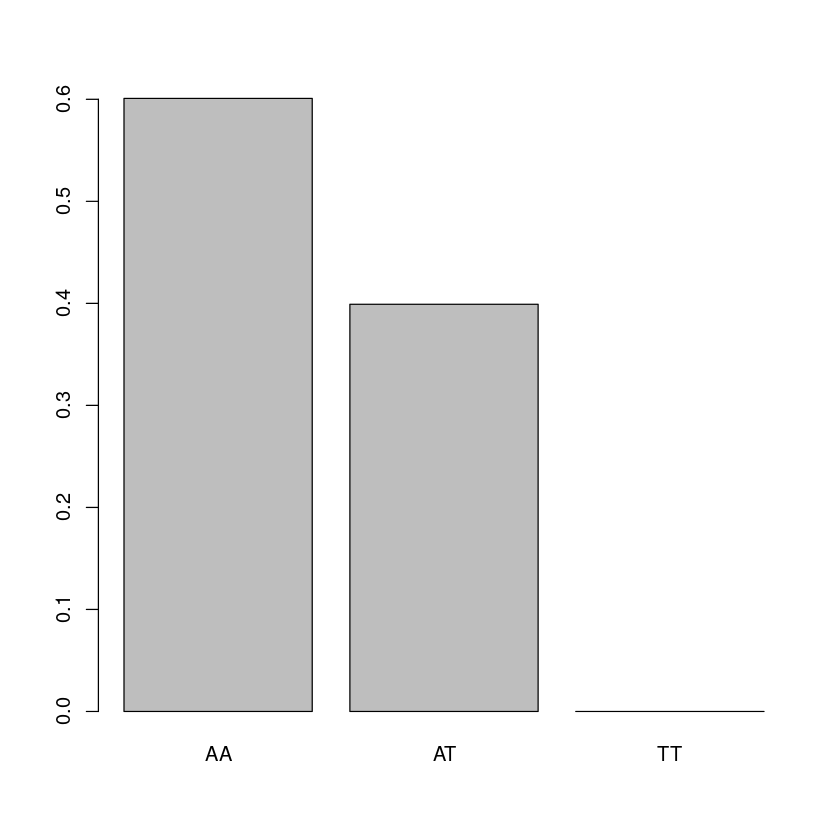

In [72]:
barplot(posterior_B)
barplot(posterior_C)
barplot(posterior_D)
barplot(posteriors_E)

___G___) 

Assuming that our collection of sequenced bases is `AAATATAAAAAAATTTTAAATTA`, calculate the genotype posterior probabilities using the same priors as in point C and sequencing error rate of 0.05. What happens if we have more data? What is the __confidence__ in our genotype inference?

In [47]:
genom <- "AAATATAAAAAAATTTTAAATTA"
P_G <- calcGenoLikes(genom, "A", "T", 0.05, FALSE)
# Prior_G <- prior_C
Prior_G <- c( (1-t)^2+i*t*(1-t), 2*t*(1-t)*(1-i), t^2+i*t*(1-t) )

Posterior_G <- P_G*Prior_G / sum(Prior_G * P_G)
Posterior_G
sum(Posterior_G)

AA           AT           TT 
2.901594e-07 9.999997e-01 5.019267e-21

[1] 1

___H)___ 

What happens if we have a lot  of data? Assume that your sequenced bases are
`bases <- paste(c(rep("A",1e3),rep("T",1e3)), sep="", collapse="")`.
Calculate the genotype likelihoods for this data.
What is happening here?

It is convenient to use numbers in log-scale and you can do that by selecting TRUE as the last parameter in the _calcGenoLikes_. 
Remember that if you want to calculate proper probabilities (in log) you have to [approximate](https://en.wikipedia.org/wiki/List_of_logarithmic_identities) the sum of logs.

Without calculating posterior probabilities, what is the effect of the prior here in your opinion?

In [66]:
genom <- paste(c(rep("A", 1e3), rep("T", 1e3), sep="", collapse=""))

P_H <- calcGenoLikes(genom, "A","T", 0.05, FALSE)
P_H

Prior_H <- c( (1-t)^2+i*t*(1-t), 2*t*(1-t)*(1-i), t^2+i*t*(1-t) )

posterior_H <- P_H*Prior_H / sum(P_H*Prior_H)
posterior_H

P_log <- calcGenoLikes(genom, "A", "T", 0.05, TRUE)

P_log + log(Prior_H)


AA AT TT 
 0  0  0

AA  AT  TT 
NaN NaN NaN

AA        AT        TT 
-4145.827 -1456.035 -4149.213